## Notebook to read in brownian simulation output and animate the data

#### Make sure markersize is equal to encounter radius 

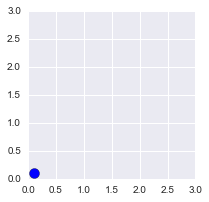

In [64]:
fig = plt.figure(figsize=(3,3))
plt.scatter(r_enc,r_enc,s=100)
plt.xlim((0,L))
plt.ylim((0,H))
plt.savefig('/Users/jakehanson/Desktop/temp.pdf')
plt.show()

#### Create Animation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Geometric Info
print 'GEOMETRY PARAMS--------------------------------------------------'
params = pd.read_csv('params.txt',sep='\t')
L = params.L[0]
H = params.H[0]
a = params.a[0]
T = params.temp[0]
r_enc = params.r_enc[0]
N_ants = params.num_ants[0]
coll_flag = params.collision_flag[0]
print '\tBox Length: ',L
print '\tBox Height: ',H
print '\tAperture Size: ',a
print '\tNumber of Ants: ',N_ants
print '\tEncounter Radius: ',r_enc
print '\tTemperature: ',T
if coll_flag == 1:
    print '\tCollisions On.'
else:
    print '\tCollisions Off.'

## Get Simulation Info
print 'SIMULATION PARAMS------------------------------------------------'
data = pd.read_csv('testing.txt',sep='\t')
uniq_time = np.unique(data.event_time)
t_max = uniq_time[-1]
t_min = uniq_time[1]-uniq_time[0]
for i in range(np.size(uniq_time)-1):
    delta_t = uniq_time[i+1] - uniq_time[i]
    if delta_t < t_min:
        t_min = delta_t
N_events = data.shape[0]/N_ants
print '\tNumber of Events: ',N_events
print '\tTotal Time: ',t_max
print '\tMinimum Time Between Events: ',t_min

## Animation Parameters
print 'ANIMATION PARAMS-------------------------------------------------'
N_frames = 100
output_every = 1
plot_dir = '/Users/jakehanson/Documents/Ants/plots/'
output_path = '/Users/jakehanson/Desktop/sim.gif'
colors = sns.color_palette('deep',N_ants).as_hex()    # Colors only constant if ant number is fixed
fig = plt.figure(figsize=(L,H))
dt = t_max/N_frames
print '\tNumber of Frames: ',N_frames
print '\tOutput Every: ',output_every
print '\tOutput Resolution: ',dt*output_every
print '\tPlot Directory: ',plot_dir
print '\tAnimation Output: ',output_path

## GENERATE ANIMATION
print 'RUNNING ANIMATION------------------------------------------------'
!rm $plot_dir/*
time_array = np.linspace(0,t_max,N_frames)  #generate evenly spaced time series
counter = -1

#Interpolate data at each time step
for t in time_array:
    counter = counter+1
    
    # get index of data array at the most recent time possible
    for j in range(np.size(uniq_time)):
        if uniq_time[j]-t <= 0.:
            index = j*N_ants
            
    # Initialize arrays to hold data for this frame
    x_positions, y_positions = [], []
    
    # Get x,y positions of ants at this time step
    for ant in range(N_ants):
        current_time = data.event_time[index]
        next_time=data.event_time[index+ant]
        if current_time != next_time:
            print "\tERROR: Not in same timestep!!\n"
            
        if data.in_nest[index+ant] == 1:
            interpolate_x = data.x[index+ant]+data.v_x[index+ant]*(t-data.event_time[index+ant])
            interpolate_y = data.y[index+ant]+data.v_y[index+ant]*(t-data.event_time[index+ant])
            x_positions.append(interpolate_x)
            y_positions.append(interpolate_y)
            
    ## Plot
    if counter%output_every == 0:
        print '\tCounter {:d}/{:d}'.format(counter,N_frames)
        print '\t\tN =',np.size(x_positions)
        plt.plot([0,0],[0,H], color='k', linestyle='-', linewidth=2)
        plt.plot([0,(L/2.-a/2.)],[H,H], color='k', linestyle='-', linewidth=2)
        plt.plot([(L/2.+a/2.),H],[L,H], color='k', linestyle='-', linewidth=2)        
        plt.plot([L,L],[H,0], color='k', linestyle='-', linewidth=2)        
        plt.plot([L,0],[0,0], color='k', linestyle='-', linewidth=2)
        #plt.axis('off')
        plt.title('Time: {:5.4f}'.format(t))
        plt.scatter(x_positions,y_positions,s=100,color='b',alpha=0.7)
        plt.xlim((0,L))
        plt.ylim((0,H))
        fname = ('plot' + '_%06d.png' % (counter))  # assign filename
        plt.savefig(plot_dir+fname)
        plt.clf()

plt.close()
print 'RUNNING CONVERSION-----------------------------------------------'
!convert $plot_dir/* $output_path
print 'DONE!'

GEOMETRY PARAMS--------------------------------------------------
	Box Length:  3
	Box Height:  3
	Aperture Size:  0.5
	Number of Ants:  10
	Encounter Radius:  0.1
	Temperature:  5
	Collisions Off.
SIMULATION PARAMS------------------------------------------------
	Number of Events:  1001
	Total Time:  9.57816
	Minimum Time Between Events:  0.00501
ANIMATION PARAMS-------------------------------------------------
	Number of Frames:  100
	Output Every:  1
	Output Resolution:  0.0957816
	Plot Directory:  /Users/jakehanson/Documents/Ants/plots/
	Animation Output:  /Users/jakehanson/Desktop/sim.gif
RUNNING ANIMATION------------------------------------------------
	Counter 0/100
		N = 10
	Counter 1/100
		N = 10
	Counter 2/100
		N = 10
	Counter 3/100
		N = 10
	Counter 4/100
		N = 10
	Counter 5/100
		N = 10
	Counter 6/100
		N = 10
	Counter 7/100
		N = 10
	Counter 8/100
		N = 10
	Counter 9/100
		N = 10
	Counter 10/100
		N = 10
	Counter 11/100
		N = 10
	Counter 12/100
		N = 10
	Counter 13/100
		

#### Get distribution of time spent with and without collisions
- Hist of time spent

#### Get time spent as a function of encouncter rate
- Check different aperture sizes

Maximum Iterations Reached
ANTS LEFT: 6
Maximum Iterations Reached
ANTS LEFT: 7
Maximum Iterations Reached
ANTS LEFT: 6
Maximum Iterations Reached
ANTS LEFT: 6
All Ants Have Left Nest
ANTS LEFT: 0
Maximum Iterations Reached
ANTS LEFT: 5
Maximum Iterations Reached
ANTS LEFT: 2
Maximum Iterations Reached
ANTS LEFT: 6
Maximum Iterations Reached
ANTS LEFT: 4
All Ants Have Left Nest
ANTS LEFT: 0
Maximum Iterations Reached
ANTS LEFT: 5
Maximum Iterations Reached
ANTS LEFT: 3
Maximum Iterations Reached
ANTS LEFT: 5
Maximum Iterations Reached
ANTS LEFT: 4
Maximum Iterations Reached
ANTS LEFT: 3
Maximum Iterations Reached
ANTS LEFT: 7
Maximum Iterations Reached
ANTS LEFT: 2
Maximum Iterations Reached
ANTS LEFT: 6
Maximum Iterations Reached
ANTS LEFT: 7
Maximum Iterations Reached
ANTS LEFT: 4
All Ants Have Left Nest
ANTS LEFT: 0
Maximum Iterations Reached
ANTS LEFT: 5
Maximum Iterations Reached
ANTS LEFT: 4
Maximum Iterations Reached
ANTS LEFT: 1
Maximum Iterations Reached
ANTS LEFT: 5
Maximum I

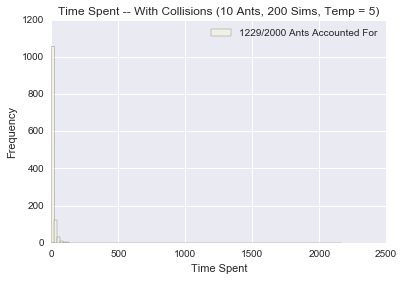

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

N_sims = 200  # number of times to run simulation
n_steps = 10000  # number of steps in a given trial (this is hardcoded in sim)
n_ants = 10  # ants per sim (also hardcoded)
Temp = 5
all_times = []
time_spent = []
#time_spent_no_coll = []
#collisions = []

for i in range(N_sims):
    !./run_sim.exe
    data = pd.read_csv('testing.txt',sep='\t')
    n_rows = data.shape[0]
    all_times.extend(data[n_rows-n_ants:n_rows]['exit_time'])
    #collisions.extend(data[n_rows-n_ants:n_rows]['collisions'])


#enc_rate = np.asarray(collisions)/np.asarray(time_spent)
#max_time = np.max(all_times)
#max_rate = np.max(enc_rate)

# Count how much of the data is accounted for
tick = 0
for i in all_times:
    if i > 0:
        tick = tick + 1
        time_spent.append(i)

print 'Ants Accounted For: ',tick,'/',n_ants*N_sims
#print time_spent
# Plot

plt.title('Time Spent -- With Collisions ({:d} Ants, {:d} Sims, Temp = {:d})'.format(n_ants,N_sims,Temp))
plt.hist(time_spent,bins=100,color='beige',alpha=0.6, label='{:d}/{:d} Ants Accounted For'.format(tick,n_ants*N_sims))
#plt.scatter(enc_rate,time_spent,color='purple',label='{:d}/{:d} Ants Accounted For'.format(tick,n_ants*N_sims))
#plt.xlim((0,max_rate))
#plt.ylim((0,max_time))
plt.ylabel('Frequency')
plt.xlabel('Time Spent')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/temp.pdf')
plt.show()

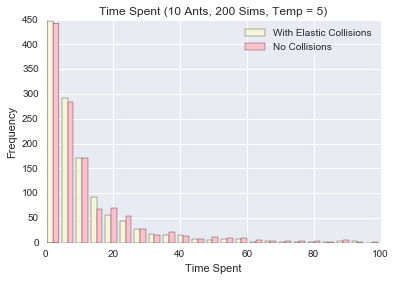

In [45]:
plt.title('Time Spent ({:d} Ants, {:d} Sims, Temp = {:d})'.format(n_ants,N_sims,Temp))
plt.hist([time_spent,time_spent_no_coll],label=['With Elastic Collisions','No Collisions'],bins=500,color=['beige','pink']
         ,histtype='bar',stacked=False)
#plt.scatter(enc_rate,time_spent,color='purple',label='{:d}/{:d} Ants Accounted For'.format(tick,n_ants*N_sims))
plt.xlim((0,100))
#plt.ylim((0,max_time))
plt.ylabel('Frequency')
plt.xlabel('Time Spent')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/temp.pdf')
plt.show()

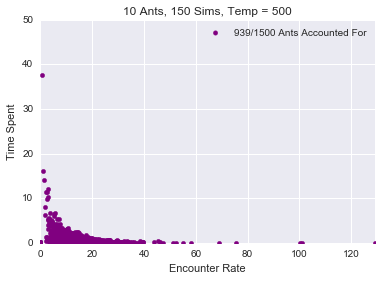

In [30]:
# Plot
plt.title('{:d} Ants, {:d} Sims, Temp = {:d}'.format(n_ants,N_sims,Temp))
plt.scatter(enc_rate,time_spent,color='purple',label='{:d}/{:d} Ants Accounted For'.format(tick,n_ants*N_sims))
plt.xlim((0,max_rate))
plt.ylim((0,50))
plt.ylabel('Time Spent')
plt.xlabel('Encounter Rate')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/temp.pdf')
plt.show()

## ADDING ELASTIC COLLISIONS DOES NOT AFFECT THE TIME SPENT IN THE NEST
## NO PEAK IN TIME SPENT AS A FUNCTION OF ENCOUNTER RATE